### Compute gcorr (ldscr)
###### Created 03/08/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join

In [46]:
raw_files_dir = '/HDD/data/ukbb/disease_sumstats/files_modified/'
#res = os.listdir(raw_files_dir)
#print(res)

diseases_traits = {
'4079':'DBP ',
'4080':'SBP',
'102':'PR',
#'1558':'Alcohol intake freq',
'21021':'Pulse wave arterial stiffness',
#'40000':'Date death',
#'42020':'Date AD',
#'30760':'HDL cholesterol',
'30780':'LDL direct',
'30870':'Triglycerides',
'2976':'Age diabetes',
'3627':'Age angina',
'3894':'Age heart attack',
'4012':'Age DVT',
'4056':'Age stroke',
'40007':'Age death',
'4689':'Age glaucoma',
'4700':'Age cataract',
'5408':'Amblyopia',
'5610':'Presbyopia',
'5832':'Hypermetropia',
'5843':'Myopia',
'5855':'Astigmatism',
'5890':'Diabetes eye',
'5945':'Eye other',
'1717':'Skin colour',
'1747':'Hair colour',
'4022':'Age pulmonary embolism',
'131380':'Circulatory sys dis',
'131390':'Other art dis'}

traits_all = list(diseases_traits.keys())

In [47]:
file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'
for disease in traits_all:
    print(disease)
    df_raw = pd.read_csv(raw_files_dir+ disease + file_name_end,  nrows=1, sep='\t')
    print(df_raw['N'])

4079
0    340162
Name: N, dtype: int64
4080
0    340159
Name: N, dtype: int64
102
0    340162
Name: N, dtype: int64
21021
0    118469
Name: N, dtype: int64
30780


FileNotFoundError: [Errno 2] File /HDD/data/ukbb/disease_sumstats/files_modified/30780_irnt.gwas.imputed_v3.both_sexes.tsv does not exist: '/HDD/data/ukbb/disease_sumstats/files_modified/30780_irnt.gwas.imputed_v3.both_sexes.tsv'

In [2]:
# path to the folder containing the .lo files
path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/2022_08_03_ventile5/main_phenos/gcorr_diseases/'
save_path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/2022_08_03_ventile5/main_phenos/gcorr_diseases/'
#'/HDD/data/ukbb/disease_sumstats/files_modified/'

In [9]:
traits_phenos = ["tau1_artery" , "tau1_vein" , "D_A_std" , "D_V_std" ,
                "bifurcations" , "VD_orig_artery" , "VD_orig_vein" , "ratio_VD" , 
                "mean_angle_taa" , "mean_angle_tva" , "eq_CRAE" , #"eq_CRVE" , 
                 "ratio_CRAE_CRVE", "medianDiameter_artery" , "medianDiameter_vein" , "ratio_AV_medianDiameter", "ratio_AV_DF"]


#traits=['4079','4080', '4700', '4056', '4012', '40007', '3894', '3627', '2976','21021']
traits_diseases=['4079','4080', '4700', '4056', '4012', '40007', '3894', '3627', '2976','21021']

traits_all=['4079','4080', '102', '1558', '21021', '40000', '42020', '30760', 
           '30780', '30870', '30750', '2976', '3627', '3894',
           '4012', '4056', '40007', '4689', '4700',  '5408',
           '5610', '5832', '5843',  '5855', '5890', '5945', 
           '1717', '1747', '4022',  '131380', '131390']

type_sex='both_sexes' #male, female
#datafields_raw = [ dat + "_raw" for dat in traits_diseases]
datafields_irnt = [ dat + "_irnt" for dat in traits_diseases]
#traits = datafields_irnt #+ datafields_raw
traits = traits_phenos + datafields_irnt

In [10]:
# filter the files names containing 2 traits
df_cov=pd.DataFrame(columns =traits, index=traits)
df_corr=pd.DataFrame(columns =traits, index=traits)
#2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
#2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

for i  in range(len(traits)):
    for j in range(len(traits)):
        #print(traits[i],traits[j])
        h2 = []
        if (traits[i] in traits_phenos) and (traits[j] in traits_phenos):
            dir_traitsfile = path+'/'+traits[i]+'__munged.sumstats.gz_'+ traits[j]+'__munged.sumstats.gz.log'
        elif (traits[i] in datafields_irnt) and (traits[j] in datafields_irnt):
            dir_traitsfile = path+'/'+traits[i]+'.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_'+ traits[j]+'.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log'
        elif (traits[i] in traits_phenos) and (traits[j] in datafields_irnt):
            dir_traitsfile = path+'/'+traits[i]+'__munged.sumstats.gz_'+ traits[j]+'.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log'
        else:
            dir_traitsfile = path+'/'+traits[i]+'.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_'+ traits[j]+'__munged.sumstats.gz.log'
        
        with open(dir_traitsfile) as fp:
            #print(fp)
            #print(traits[i], traits[j])
            Lines = fp.readlines()
            for line in Lines:
                #print(line)
                split = line.split()
                if('gencov:' in split):
                    df_cov.iloc[i][j] = float(split[ split.index('gencov:') +1 ])
                    df_cov.iloc[j][i] = float(split[ split.index('gencov:') +1 ])
                    #print(split)
                if('Correlation:' in split):
                    #print(line)
                    #print(split)
                    df_corr.iloc[i][j] = float(split[ split.index('Correlation:') +1 ]) 
                    df_corr.iloc[j][i] = float(split[ split.index('Correlation:') +1 ])
                    #print(array2)
                    #print(split )
                    #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                    #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))



In [11]:
df_corr = df_corr.astype(float)
df_corr

,4079_irnt,4080_irnt,4700_irnt,4056_irnt,4012_irnt,40007_irnt,3894_irnt,3627_irnt,2976_irnt,21021_irnt
4079_irnt,0.9992,NaN,-0.3199,NaN,NaN,NaN,NaN,-0.6098,-0.2415,NaN
4080_irnt,NaN,0.9983,-0.3207,NaN,NaN,NaN,0.0986,-0.1615,-0.6341,-0.5389
4700_irnt,-0.3199,-0.3207,1.0000,NaN,NaN,NaN,-0.7204,-0.1189,NaN,NaN
4056_irnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4012_irnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40007_irnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894_irnt,NaN,0.0986,-0.7204,NaN,NaN,NaN,1.0000,NaN,NaN,NaN
3627_irnt,-0.6098,-0.1615,-0.1189,NaN,NaN,NaN,NaN,1.0000,NaN,0.8735
2976_irnt,-0.2415,-0.6341,NaN,NaN,NaN,NaN,NaN,NaN,1.0003,0.4017
21021_irnt,NaN,-0.5389,NaN,NaN,NaN,NaN,NaN,0.8735,0.4017,1.0000


In [12]:
### replace nan by 0
df_corr= df_corr.replace(np.nan, 0)

In [13]:
df_corr

,4079_irnt,4080_irnt,4700_irnt,4056_irnt,4012_irnt,40007_irnt,3894_irnt,3627_irnt,2976_irnt,21021_irnt
4079_irnt,0.9992,0.0000,-0.3199,0.0,0.0,0.0,0.0000,-0.6098,-0.2415,0.0000
4080_irnt,0.0000,0.9983,-0.3207,0.0,0.0,0.0,0.0986,-0.1615,-0.6341,-0.5389
4700_irnt,-0.3199,-0.3207,1.0000,0.0,0.0,0.0,-0.7204,-0.1189,0.0000,0.0000
4056_irnt,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
4012_irnt,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
40007_irnt,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
3894_irnt,0.0000,0.0986,-0.7204,0.0,0.0,0.0,1.0000,0.0000,0.0000,0.0000
3627_irnt,-0.6098,-0.1615,-0.1189,0.0,0.0,0.0,0.0000,1.0000,0.0000,0.8735
2976_irnt,-0.2415,-0.6341,0.0000,0.0,0.0,0.0,0.0000,0.0000,1.0003,0.4017
21021_irnt,0.0000,-0.5389,0.0000,0.0,0.0,0.0,0.0000,0.8735,0.4017,1.0000


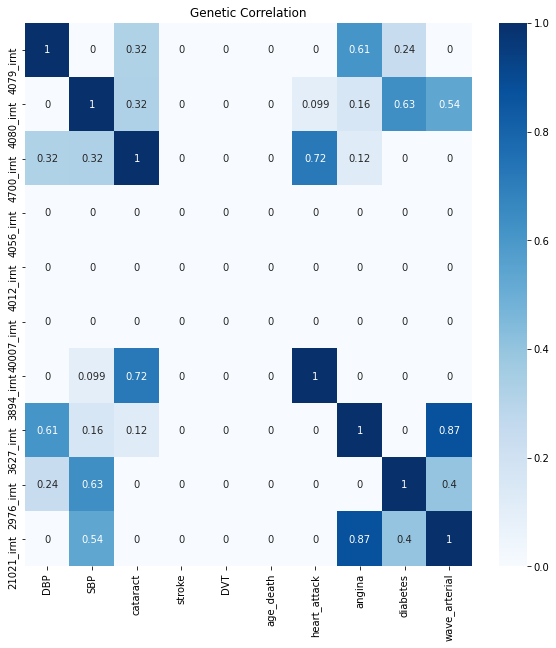

In [16]:
#### gen corr
df_aux_ = df_corr
df_aux_.rename(columns = {'4079_irnt':'DBP', '4080_irnt':'SBP', '4700_irnt':'cataract',
                        '4056_irnt':'stroke', '4012_irnt':'DVT', '40007_irnt':'age_death',
                        '3894_irnt':'heart_attack', '3627_irnt':'angina', '2976_irnt':'diabetes', '21021_irnt':'wave_arterial'}, inplace = True)

#plt.figure(figsize=(80,80))
plt.figure(figsize=(10,10))
sb.heatmap(abs(df_aux_),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig(save_path +'diseases_gcorr.jpg')



In [94]:
df_aux= df_corr.copy()
df_aux= df_aux[datafields_irnt]
df_aux.rename(columns = {'4079_irnt':'DBP', '4080_irnt':'SBP', '4700_irnt':'cataract',
                        '4056_irnt':'stroke', '4012_irnt':'DVT', '40007_irnt':'age_death',
                        '3894_irnt':'heart_attack', '3627_irnt':'angina', '2976_irnt':'diabetes', '21021_irnt':'wave_arterial'}, inplace = True)
df_aux = df_aux.round(3)
df_aux

,DBP,SBP,cataract,stroke,DVT,age_death,heart_attack,angina,diabetes,wave_arterial
tau1_artery,-0.006,-0.025,0.017,0.0,0.0,0.0,0.040,-0.098,0.678,-0.791
tau1_vein,-0.181,-0.136,0.129,0.0,0.0,0.0,-0.354,0.040,0.409,-0.518
D_A_std,0.248,0.112,0.099,0.0,0.0,0.0,0.152,0.087,0.719,0.668
D_V_std,0.072,-0.037,0.201,0.0,0.0,0.0,-0.222,-0.065,0.412,0.151
bifurcations,0.260,0.375,-0.374,0.0,0.0,0.0,-0.707,-0.178,0.285,-0.552
VD_orig_artery,0.210,0.363,-0.123,0.0,0.0,0.0,-0.507,0.031,0.377,-0.491
VD_orig_vein,0.041,0.316,-0.256,0.0,0.0,0.0,-0.405,-0.136,0.210,-0.752
ratio_VD,0.220,0.181,0.146,0.0,0.0,0.0,-0.431,0.118,0.376,0.256
mean_angle_taa,0.037,0.160,0.024,0.0,0.0,0.0,-0.136,-0.159,0.735,0.010
mean_angle_tva,0.393,0.245,0.670,0.0,0.0,0.0,0.594,-0.121,-0.273,0.610


# pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
# clustering method: average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


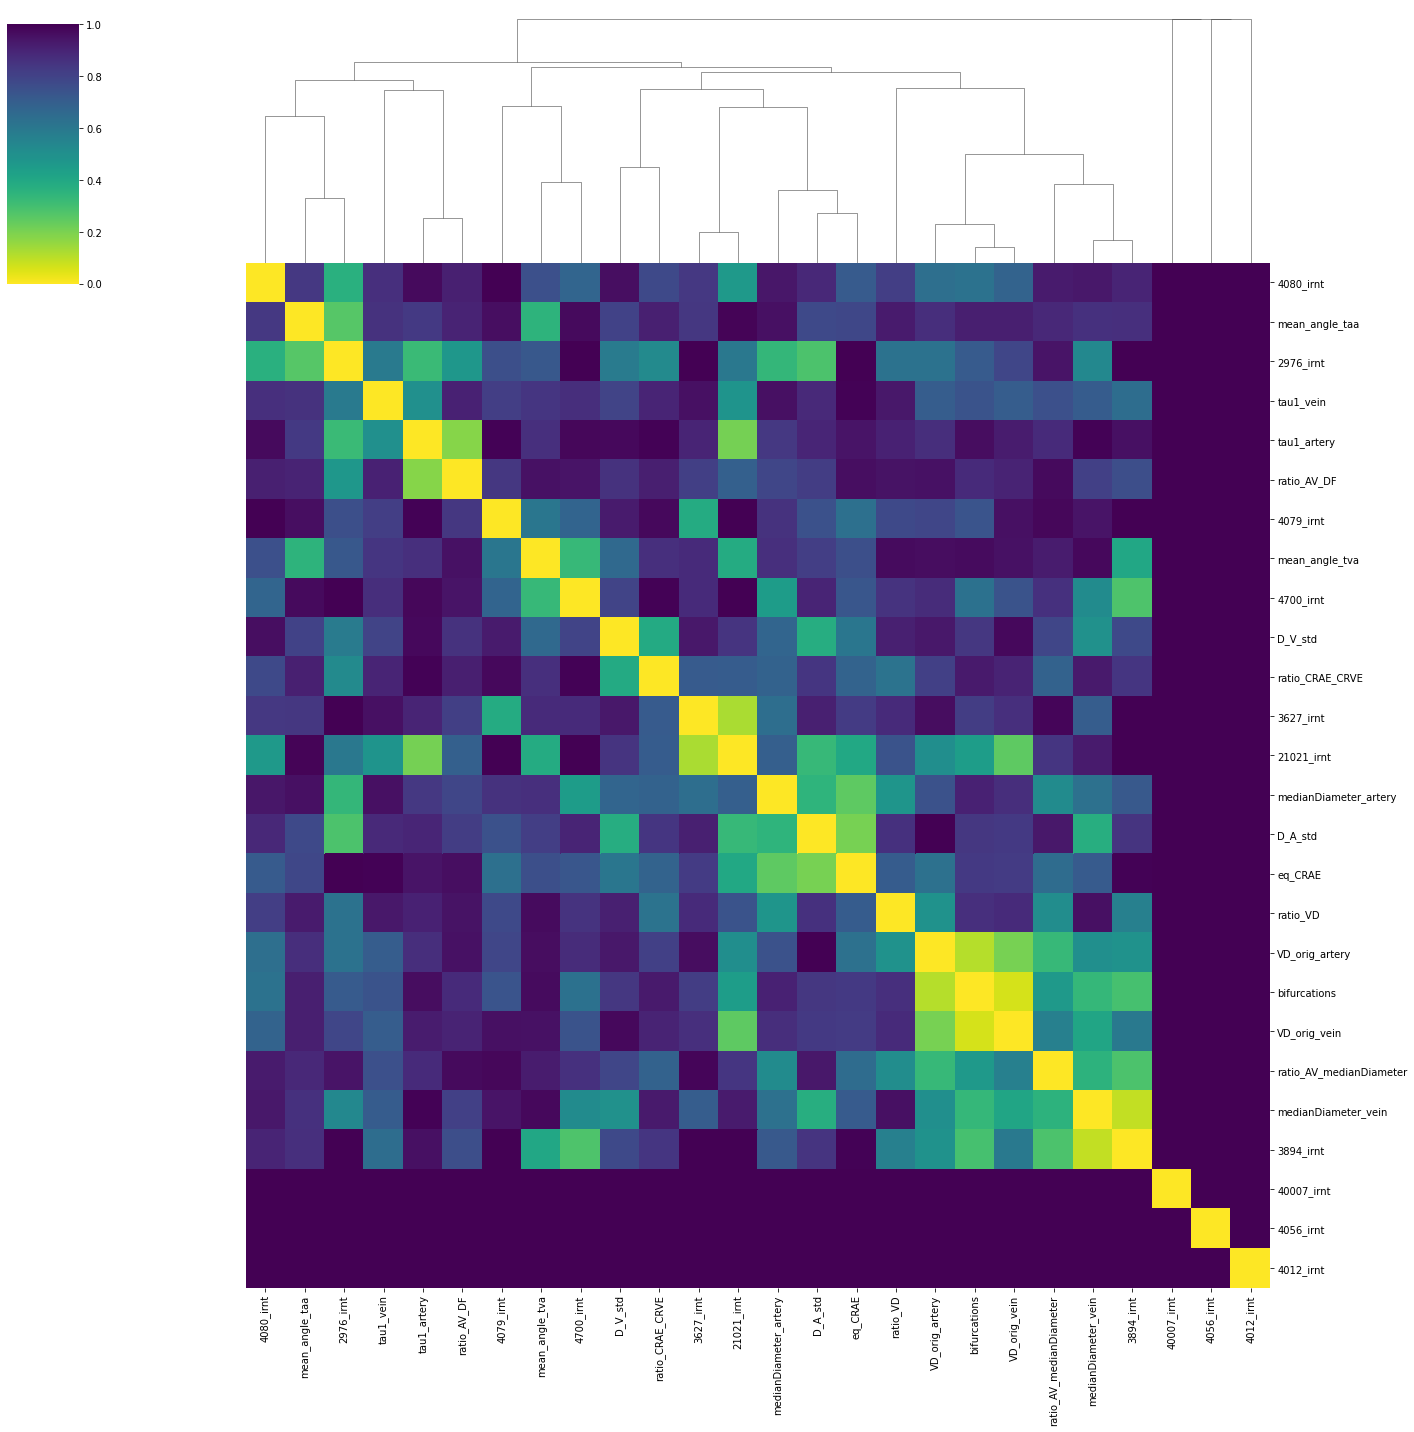

In [89]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
#print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/diseases_12_08_2022_gcorrimagen.jpg')